## Q1. What is the mathematical formula for a linear SVM?

A linear Support Vector Machine (SVM) aims to find the optimal hyperplane that separates the data into different classes. The mathematical formula for the decision boundary of a linear SVM is:

\[ f(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b = 0 \]

where:
- \(\mathbf{x}\) is the input feature vector.
- \(\mathbf{w}\) is the weight vector.
- \(b\) is the bias term.


## Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM is to find the optimal hyperplane that maximizes the margin between the classes while minimizing the classification error. The objective function is given by:

\[ \min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i \]

subject to:

\[ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i \]

\[ \xi_i \geq 0, \, i = 1, \ldots, n \]

where:
- \(\|\mathbf{w}\|\) is the Euclidean norm of the weight vector.
- \(C\) is the regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
- \(\xi_i\) are the slack variables that allow some misclassifications.

## Q3. What is the kernel trick in SVM?

The kernel trick is a technique used in SVMs to transform the input data into a higher-dimensional space where it is easier to find a linear separating hyperplane. This is done without explicitly computing the coordinates of the data in that higher-dimensional space. Instead, a kernel function computes the inner product of the data points in this high-dimensional space. Common kernel functions include:

- Linear kernel: \( K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j \)
- Polynomial kernel: \( K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + 1)^d \)
- Radial basis function (RBF) kernel: \( K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2) \)


## Q4. What is the role of support vectors in SVM? Explain with example.

Support vectors are the data points that are closest to the decision boundary (hyperplane). These points are critical in defining the position and orientation of the hyperplane. The support vectors lie on the edges of the margin and help in maximizing the margin between the classes. If the support vectors are removed, the hyperplane would change, illustrating their importance.

*Example:*

Consider a binary classification problem where two classes are linearly separable. The support vectors are the closest points from each class to the hyperplane. These points directly influence the calculation of the margin and hence the decision boundary.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM

- *Hyperplane:* The decision boundary that separates the classes. For a 2D feature space, it's a line; for a 3D feature space, it's a plane.

- *Marginal planes:* These are parallel to the hyperplane and pass through the support vectors. They define the margin of the classifier.

- *Hard margin:* SVM with no misclassification allowed. All data points must be correctly classified and lie outside the margin.

- *Soft margin:* SVM that allows some misclassification to achieve better generalization, controlled by the regularization parameter \(C\).

#### Graphs:

1. *Hyperplane and Marginal Planes:*
   ![Hyperplane and Marginal Planes](https://www.researchgate.net/profile/Jianjun-Yang-6/publication/322514661/figure/fig1/AS:586430451208194@1515673849717/Schematic-diagram-of-linear-SVMs-including-the-hyperplane-marginal-plane-and-support.png)

2. *Hard Margin:*
   ![Hard Margin](https://qph.fs.quoracdn.net/main-qimg-e57d5d4a781f6b7d8df2a90f8829be1b)

3. *Soft Margin:*
   ![Soft Margin](https://qph.cf2.quoracdn.net/main-qimg-5c3c21397fd26e0d1f09f4960a4392cb)

Accuracy: 1.0


/tmp/ipykernel_384/1990443739.py:63: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', marker='x', s=50)


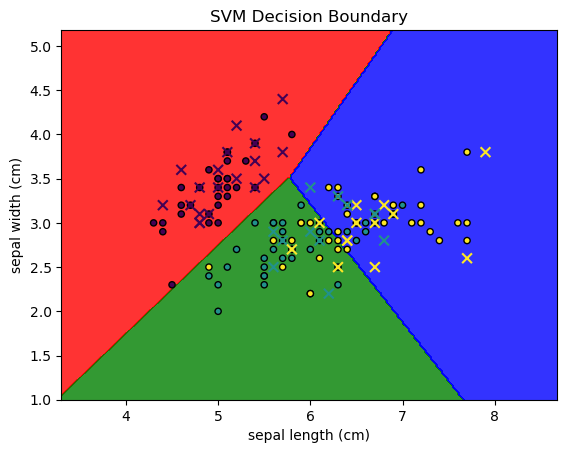

Accuracy for C=0.01: 0.9777777777777777
Accuracy for C=0.1: 1.0
Accuracy for C=1: 1.0
Accuracy for C=10: 0.9777777777777777
Accuracy for C=100: 1.0


In [3]:
## Q6. SVM Implementation through Iris dataset

#### Load the iris dataset from the scikit-learn library and split it into a training set and a testing set

from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Train a linear SVM classifier on the training set and predict the labels for the testing set

from sklearn.svm import SVC

# Train a linear SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm_model.predict(X_test)


#### Compute the accuracy of the model on the testing set

from sklearn.metrics import accuracy_score

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


#### Plot the decision boundaries of the trained model using two of the features

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Choose two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train a linear SVM classifier on the reduced dataset
svm_model_2d = SVC(kernel='linear')
svm_model_2d.fit(X_train_2d, y_train)

# Plot the decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=20)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', marker='x', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundary')
plt.show()


#### Try different values of the regularization parameter \(C\) and see how it affects the performance of the model

# Train SVM with different values of C
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for C={C}: {accuracy}')


# This code provides a complete implementation for training and evaluating a linear SVM on the Iris dataset, including visualization of the decision boundaries and analysis of the impact of the regularization parameter \(C\)